<a href="https://colab.research.google.com/github/Rahafzsh/ComputerVisionTasks/blob/main/Lab1/CVLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Image Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/ComputerVisionTasks/Lab1'

/content/drive/My Drive/ComputerVisionTasks/Lab1


In [13]:
!cd 'C:/Users/iraha/OneDrive - IMAM ABDULRAHMAN BIN FAISAL UNIVERSITY/Desktop/GitHub/ComputerVisionTasks/Lab1/FlowersDataset'
!ls -l FlowersDataset

/bin/bash: line 1: cd: C:/Users/iraha/OneDrive - IMAM ABDULRAHMAN BIN FAISAL UNIVERSITY/Desktop/GitHub/ComputerVisionTasks/Lab1/FlowersDataset: No such file or directory
total 439
-rw------- 1 root root 418049 Feb 11 22:07 LICENSE.txt
-rw------- 1 root root   9251 Feb 11 22:07 sample_submission.csv
drwx------ 2 root root   4096 Feb 11 22:07 test
-rw------- 1 root root  12837 Feb 11 22:07 Testing_set_flower.csv
drwx------ 2 root root   4096 Feb 11 22:07 train


In [37]:
!cd FlowersDataset
!ls

/bin/bash: line 1: cd: FlowersDataset: No such file or directory
LICENSE.txt  sample_submission.csv  test  Testing_set_flower.csv  train


### Task 1: Preprocessing and Data Augmentation

* **STEP 1:** Import required libraries

In [38]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.applications import VGG19
from keras.applications import VGG16, EfficientNetB7, NASNetMobile, MobileNetV2
from PIL import Image
import matplotlib.pyplot as plt
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

In [39]:
# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 5

In [44]:
train_folder = 'train'
test_folder = 'test'

In [41]:
# Load image data
def load_train_data(folder_path):
    X = []
    y = []
    class_names = os.listdir(folder_path)
    print(class_names)

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y


In [42]:
# Load image data
def load_test_data(folder_path):
    X = []
    filenames = []
    for image_name in os.listdir(folder_path):
        if image_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            filenames.append(image_name)
    X = np.array(X)
    return X, filenames

In [45]:
X_train, y_train = load_train_data(train_folder)
X_test, test_filenames = load_test_data(test_folder)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [46]:
X_train.shape

(780, 224, 224, 3)

In [50]:
y_train.shape

(780,)

In [51]:
X_test.shape

(924, 224, 224, 3)

### Displaying some samples of training

In [47]:
def display_sample_images(folder_path, class_names, num_samples=3):
    plt.figure(figsize=(10, 6))
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        image_names = os.listdir(class_path)[:num_samples]
        for j, image_name in enumerate(image_names):
            image_path = os.path.join(class_path, image_name)
            image = Image.open(image_path)
            plt.subplot(len(class_names), num_samples, i * num_samples + j + 1)
            plt.imshow(image)
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

In [48]:
# Get class names
train_class_names = os.listdir(train_folder)


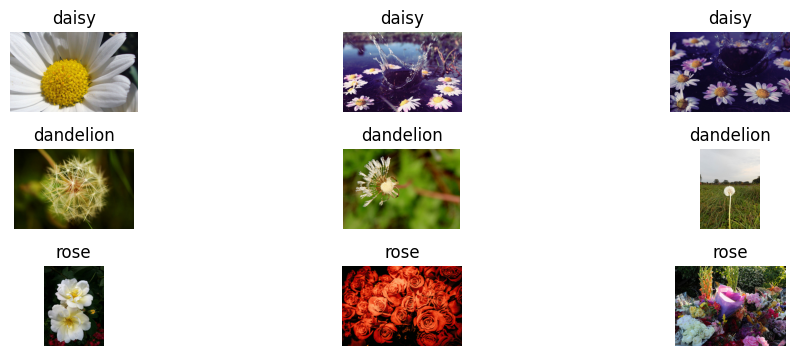

In [49]:
# Display sample images
display_sample_images(train_folder, train_class_names)

In [25]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [26]:
import tensorflow_hub as hub

pretrained_layer = Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" , input_shape = (224,224,3))
])

model = Sequential([
    pretrained_layer ,
    Dense(5,activation = 'softmax')
])

In [27]:
# Model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
checkpoint = ModelCheckpoint('flower_mobilenet_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val), callbacks=[checkpoint])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.9682 - accuracy: 0.6122
Epoch 1: val_loss improved from inf to 0.45981, saving model to flower_mobilenet_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 10s 202ms/step - loss: 0.9682 - accuracy: 0.6122 - val_loss: 0.4598 - val_accuracy: 0.8462
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.3455 - accuracy: 0.8654
Epoch 2: val_loss improved from 0.45981 to 0.28820, saving model to flower_mobilenet_model.h5
20/20 [==============================] - 1s 61ms/step - loss: 0.3455 - accuracy: 0.8654 - val_loss: 0.2882 - val_accuracy: 0.8846
Epoch 3/10
19/20 [===========================>..] - ETA: 0s - loss: 0.2284 - accuracy: 0.9211
Epoch 3: val_loss improved from 0.28820 to 0.24348, saving model to flower_mobilenet_model.h5
20/20 [==============================] - 1s 60ms/step - loss: 0.2289 - accuracy: 0.9199 - val_loss: 0.2435 - val_accuracy: 0.9231
Epoch 4/10
19/20 [===========================>..] - ETA: 0s - loss: 0.1820 - accuracy: 0.9457
Epoch 4: val_loss improved from 0.24348 to 0.19993, saving model to flower_mobilenet_model.h5
20/20 [==============================] - 1s 

In [28]:
model.evaluate(X_val,y_val)

5/5 [==============================] - 0s 36ms/step - loss: 0.1427 - accuracy: 0.9487


[0.1427401453256607, 0.9487179517745972]

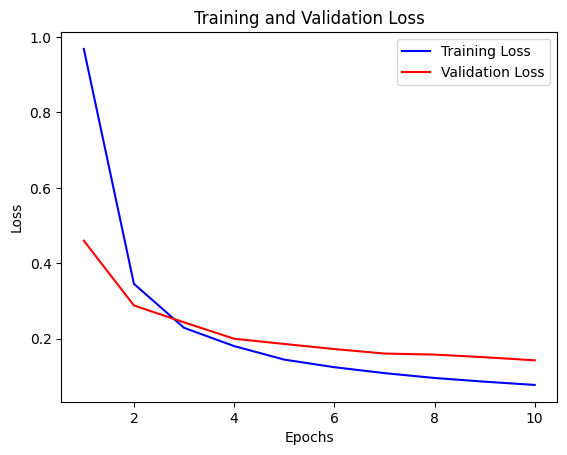

In [29]:
# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b-', label='Training Loss')  # Change 'bo' to 'b-'
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

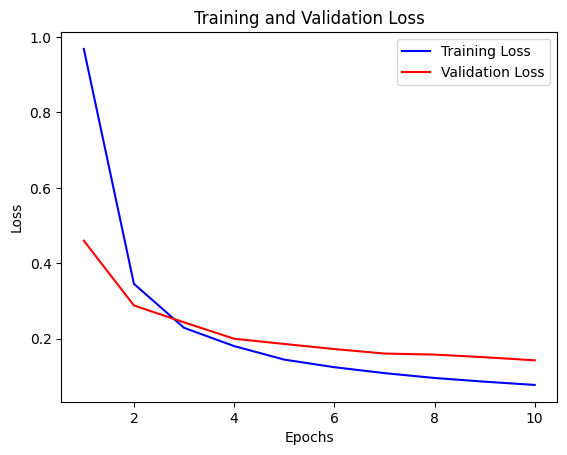

In [30]:
# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b-', label='Training Loss')  # Change 'bo' to 'b-'
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

29/29 [==============================] - 1s 20ms/step


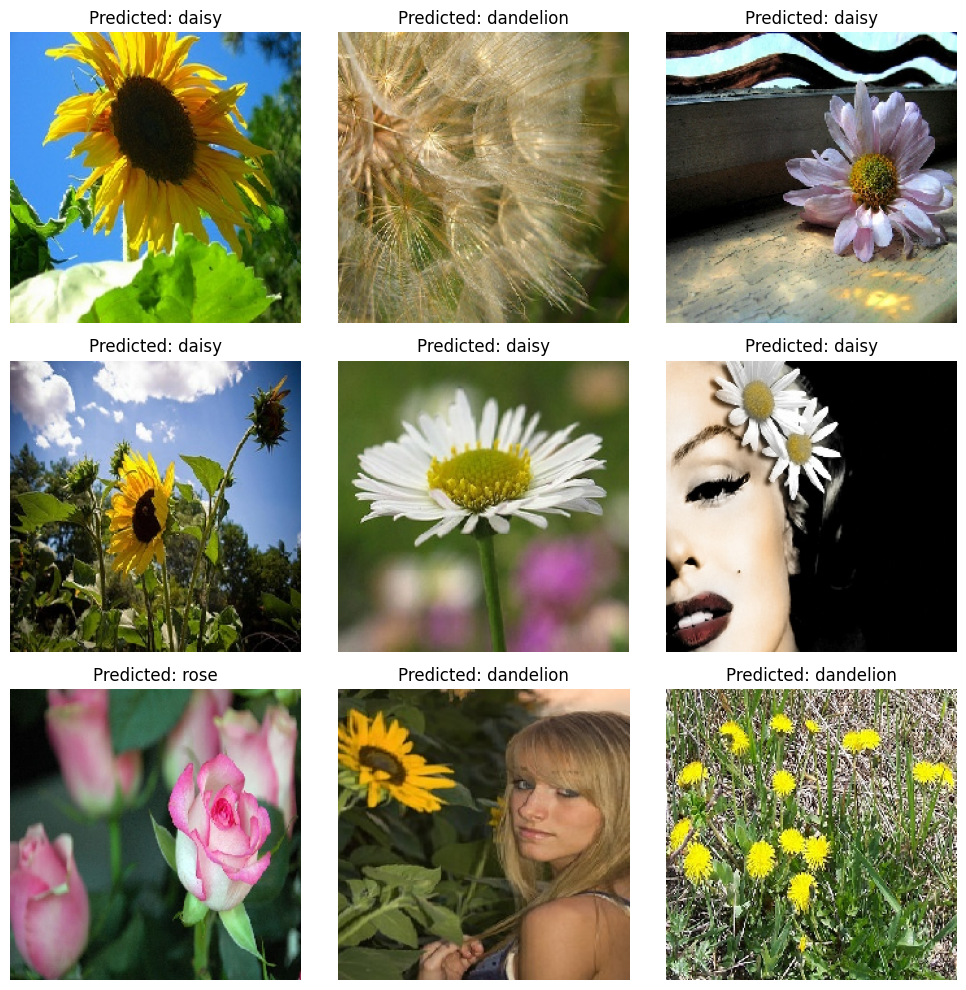

In [31]:
# Predict class names for test data
test_predictions = model.predict(X_test)
class_names = os.listdir(train_folder)
class_to_index = {class_name: i for i, class_name in enumerate(class_names)}
index_to_class = {i: class_name for i, class_name in enumerate(class_names)}
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_predictions_class_names = [index_to_class[idx] for idx in test_predictions_classes]

# Plot some images with predicted classes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    plt.title("Predicted: {}".format(test_predictions_class_names[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

5/5 [==============================] - 1s 19ms/step


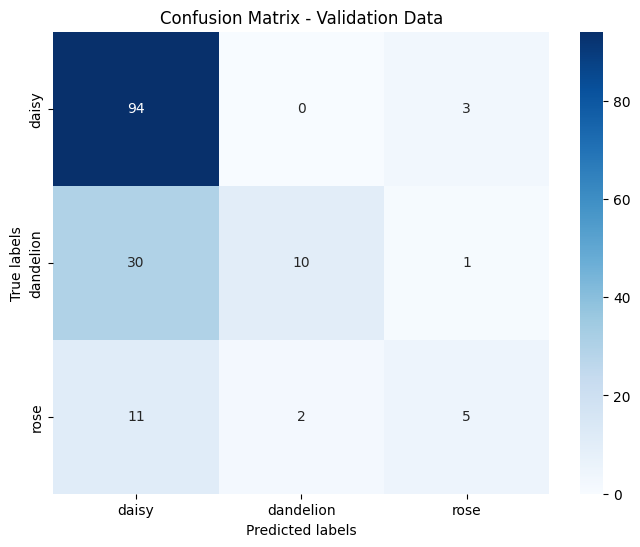

In [87]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

classes=['daisy','dandelion', 'rose']

# Get true labels and predicted labels for validation data
y_true_val = y_val
y_pred_val = np.array([np.argmax(pred) for pred in model.predict(X_val)])

# Compute confusion matrix
conf_mat_val = confusion_matrix(y_true_val, y_pred_val)

# Plot confusion matrix for validation data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_val, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Validation Data')
plt.show()

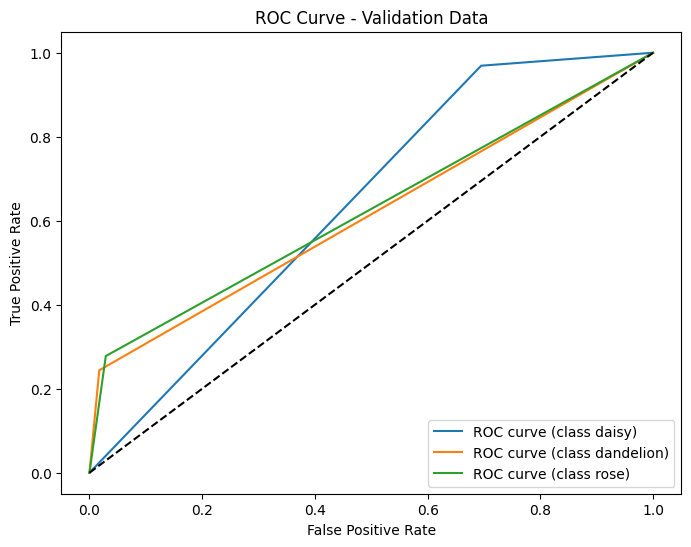

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for validation data
fpr_val = dict()
tpr_val = dict()
roc_auc_val = dict()
for i in range(3):
    fpr_val[i], tpr_val[i], _ = roc_curve((y_true_val == i).astype(int), (y_pred_val == i).astype(int))
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

# Plot ROC curve for validation data
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr_val[i], tpr_val[i], label='ROC curve (class {})'.format(classes[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Data')
plt.legend(loc="lower right")
plt.show()

In [90]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n", classification_report(y_true_val, y_pred_val, target_names=classes))

Classification Report:
               precision    recall  f1-score   support

       daisy       0.70      0.97      0.81        97
   dandelion       0.83      0.24      0.38        41
        rose       0.56      0.28      0.37        18

    accuracy                           0.70       156
   macro avg       0.70      0.50      0.52       156
weighted avg       0.72      0.70      0.65       156

